In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from scipy.stats import percentileofscore 
from scipy.stats import pearsonr

all_data = pd.read_csv('all_data.csv')

# Preliminary Data Cleaning:
1. Check the shape of the data.
2. Check for Missing Values.
3. Count unique Values for each Column. 

In [2]:
# 1. Reads in Data source
# 2. Checks:
#         a) Data Shape
#         b) Missing Values
#         c) Unique Value Counts 
#  3. Returns statement if duplicates were or were not found. 
#  4. Prints all_data.head(), shape, sum count missing values, unique values count, all data cleaned

#### Future Improvements: 
## 
#raw_data = 
def preliminary_data_cleaning(data_source):
    all_data = pd.read_csv(data_source)
    shape = all_data.shape
    missing_values = all_data.isna().sum()
    unique_values = all_data.nunique()
    all_data_cleaned = all_data.drop_duplicates()
    
    if shape[0] == len(all_data_cleaned):
        print("No duplicates were found.\n\nDO NOT FORGET TO MANUALLY CHECK FOR UNTIDY DATA!!")
    else:
        print('Duplicates found. Must manually investigate.')
    print(f'''
          \nAll DATA.head():
          \n{all_data.head()}\n
          \nDataframe SHAPE: {shape}\n
          \nMISSING VALUE COUNTS:
          \n{missing_values}\n
          \nUNIQUE VALUE COUNTS:
          \n{unique_values}\n
          \n\nDATA TYPES:
          \n{all_data.dtypes}
          ''')
preliminary_data_cleaning('all_data.csv')

No duplicates were found.

DO NOT FORGET TO MANUALLY CHECK FOR UNTIDY DATA!!

          
All DATA.head():
          
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10

          
Dataframe SHAPE: (96, 4)

          
MISSING VALUE COUNTS:
          
Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

          
UNIQUE VALUE COUNTS:
          
Country                              6
Year                                16
Life expectancy at birth (years)    69
GDP                                 96
dtype: int64

          

DATA TYPES:
          
Cou

In [3]:
new_columns = ['country', 'year', 'life_expectancy', 'GDP']
df = pd.DataFrame(all_data)
df.columns = new_columns
df.country = df.country.str.replace("United States of America", "USA")




In [4]:
column_ranges = {}
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        column_range = df[column].groupby(df.country).max() - df[column].groupby(df.country).min()
        column_ranges[column] = column_range
    else:
        column_range = "Not Applicable Data Type"
print(column_ranges)

{'year': country
Chile       15
China       15
Germany     15
Mexico      15
USA         15
Zimbabwe    15
Name: year, dtype: int64, 'life_expectancy': country
Chile        3.2
China        4.4
Germany      3.0
Mexico       1.9
USA          2.5
Zimbabwe    16.4
Name: life_expectancy, dtype: float64, 'GDP': country
Chile       2.086472e+11
China       9.853350e+12
Germany     1.940660e+12
Mexico      6.148120e+11
USA         7.800000e+12
Zimbabwe    1.188897e+10
Name: GDP, dtype: float64}


# Descriptive Statistics:

In [5]:
print(df.describe())
print(df.country.unique())

              year  life_expectancy           GDP
count    96.000000        96.000000  9.600000e+01
mean   2007.500000        72.789583  3.880499e+12
std       4.633971        10.672882  5.197561e+12
min    2000.000000        44.300000  4.415703e+09
25%    2003.750000        74.475000  1.733018e+11
50%    2007.500000        76.750000  1.280220e+12
75%    2011.250000        78.900000  4.067510e+12
max    2015.000000        81.000000  1.810000e+13
['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


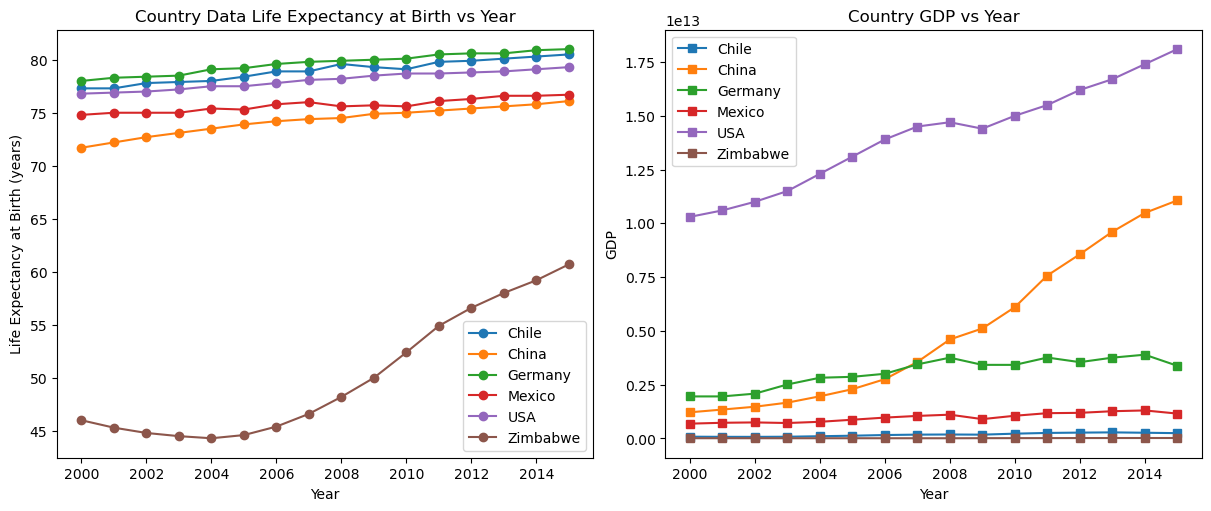

In [6]:
fig, ax = plt.subplots(1,2,figsize= (12,5), layout = 'constrained')

# Country Life Expectancy vs Year
plt.subplot(1,2,1)
ax = plt.subplot(1,2,1)
for country in df.country.unique():
    country_data = df[df.country == country]
    ax.plot(country_data.year, country_data.life_expectancy, label = country, marker = 'o')
ax.legend()

plt.title('Country Data Life Expectancy at Birth vs Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')

## Country GDP Vs Year
plt.subplot(1,2,2)
ax = plt.subplot(1,2,2)
for country in df.country.unique():
   country_data = df[df.country == country]
   ax.plot(country_data.year, country_data.GDP, label = country, marker = 's')   

ax.legend()
plt.title('Country GDP vs Year')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [7]:
# Calculate YoY GDP Growth Rate by Country. 
df = df.sort_values(by = ['country', 'year'])

df['YoY_growth_rate'] = df.groupby('country')['GDP'].pct_change() *100 
print(df.head())

  country  year  life_expectancy           GDP  YoY_growth_rate
0   Chile  2000             77.3  7.786093e+10              NaN
1   Chile  2001             77.3  7.097992e+10        -8.837562
2   Chile  2002             77.8  6.973681e+10        -1.751358
3   Chile  2003             77.9  7.564346e+10         8.469915
4   Chile  2004             78.0  9.921039e+10        31.155282


# Correlation Analysis:

In [8]:
# Correlation Overall 
correlation = df.GDP.corr(df.life_expectancy)
print(f"For all Data GDP Correlation with Life Expectancy: \nPearson Correlation Coefficient: {correlation}\n\n")

# Grouped Correlation:
grouped_corr = df.groupby('country').apply(lambda x: df.GDP.corr(x['life_expectancy']))
print(f"The Correlation of GDP and Life Expectancy by Country: {grouped_corr}")

For all Data GDP Correlation with Life Expectancy: 
Pearson Correlation Coefficient: 0.3432067484491559


The Correlation of GDP and Life Expectancy by Country: country
Chile       0.949877
China       0.908526
Germany     0.932699
Mexico      0.932238
USA         0.981709
Zimbabwe    0.966200
dtype: float64


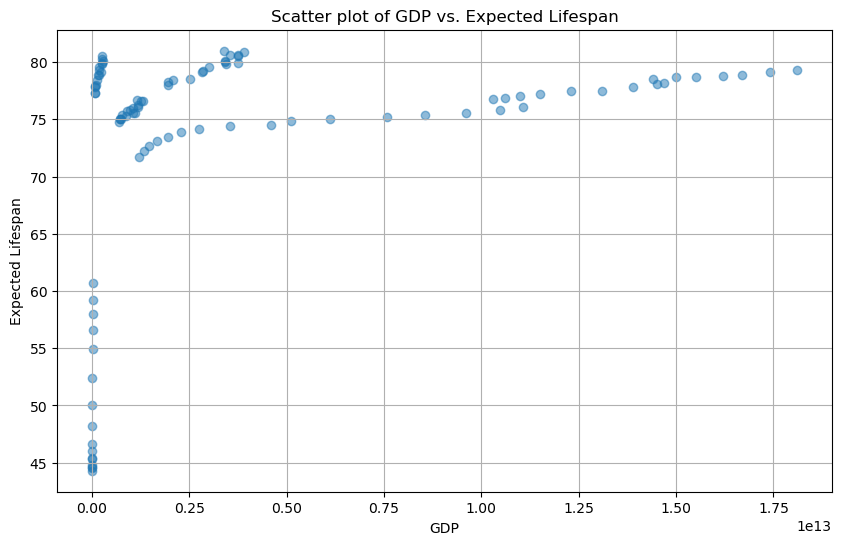

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df['GDP'], df['life_expectancy'], alpha=0.5)
plt.title('Scatter plot of GDP vs. Expected Lifespan')
plt.xlabel('GDP')
plt.ylabel('Expected Lifespan')
plt.grid(True)
plt.show()


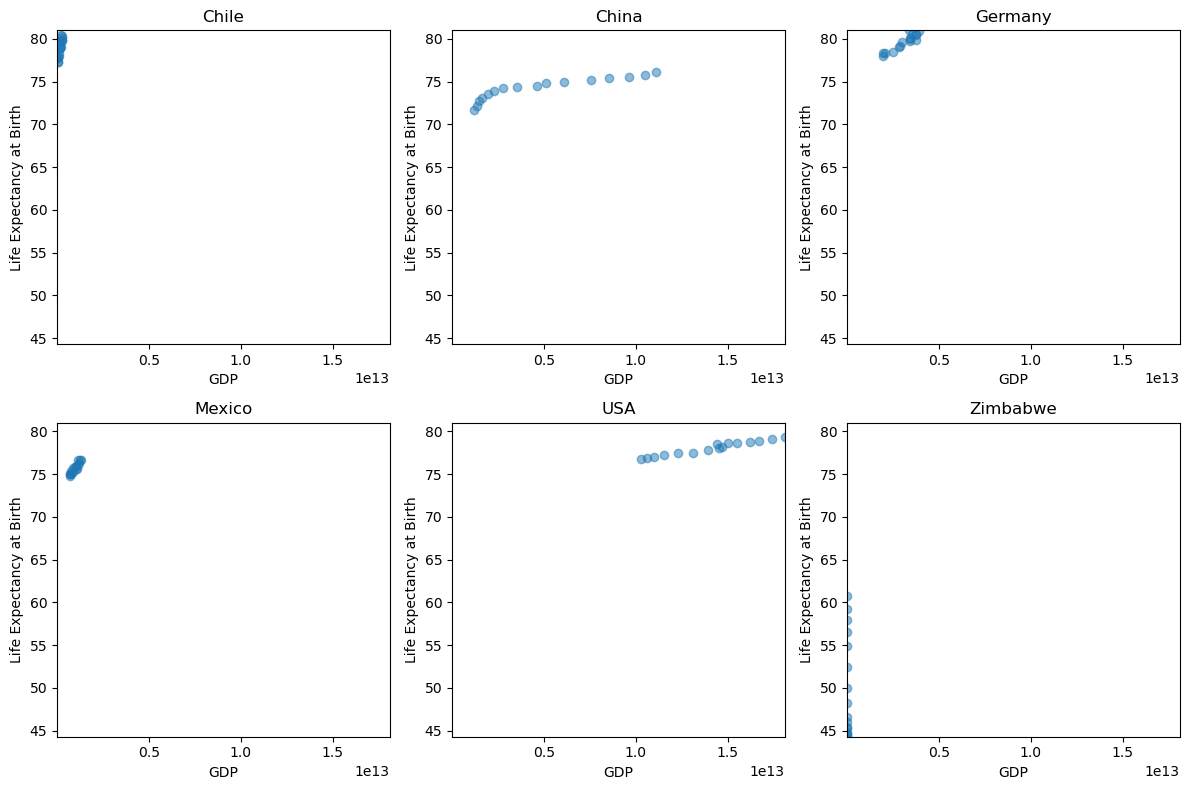

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12,8))
# Filter By Country
countries = df.country.unique()

# Flatten the axes array for easier iteration:
axes = axes.ravel()

###Create a touple of (i, country) using enumerate(countries).
## Use i for designating plot position and axes.
# Use country for accessing the data.
for i, country in enumerate(countries):
   
   # Filter dataframe to country in question.
   country_data = df[df.country==country]
   # Create plot at position i
   axes[i].scatter(country_data['GDP'], country_data['life_expectancy'], alpha = 0.5)
   
   # Format Subplot
   axes[i].set_title(country)
   
   axes[i].set_xlim([df.GDP.min(), df.GDP.max()])
   axes[i].set_ylim([df.life_expectancy.min(), df.life_expectancy.max()])
   
   axes[i].set_xlabel('GDP')
   axes[i].set_ylabel('Life Expectancy at Birth')


plt.tight_layout()
plt.show()



Chile
Intercept    7.672234e+01
GDP          1.308337e-11
dtype: float64


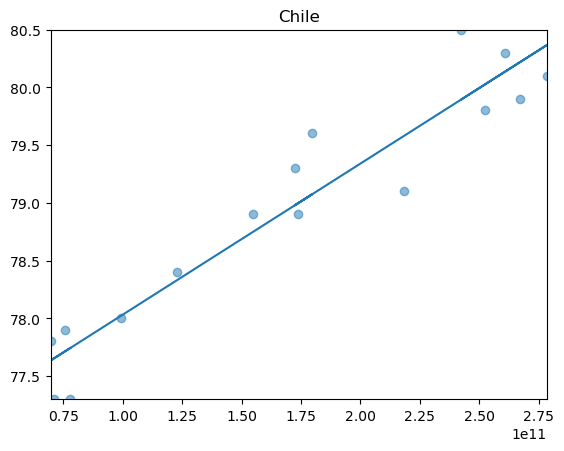

China
Intercept    7.256685e+01
GDP          3.420219e-13
dtype: float64


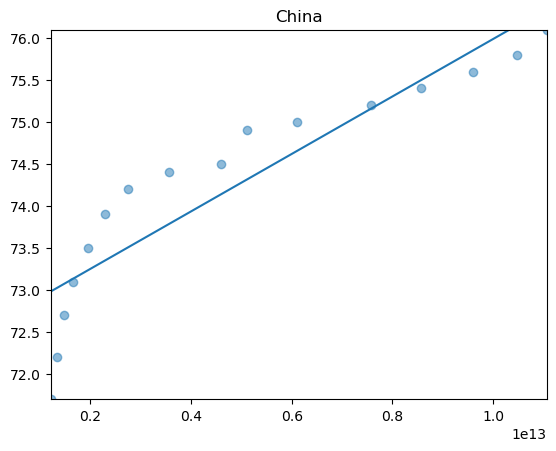

Germany
Intercept    7.543994e+01
GDP          1.362397e-12
dtype: float64


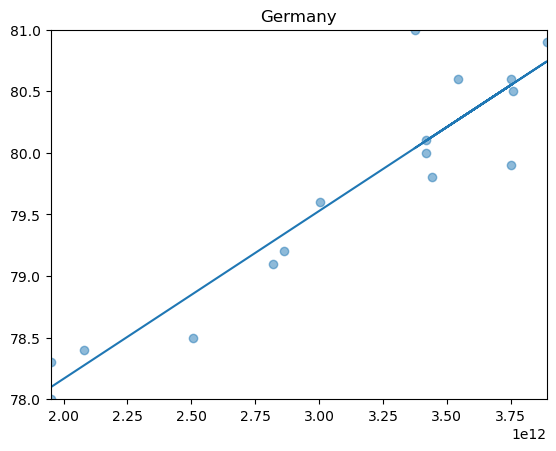

Mexico
Intercept    7.302091e+01
GDP          2.762337e-12
dtype: float64


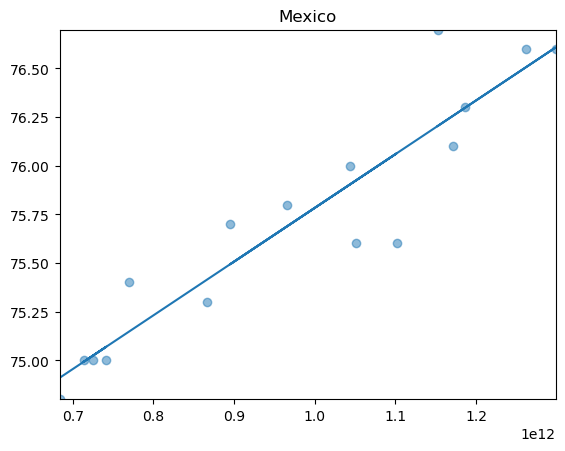

USA
Intercept    7.333357e+01
GDP          3.359806e-13
dtype: float64


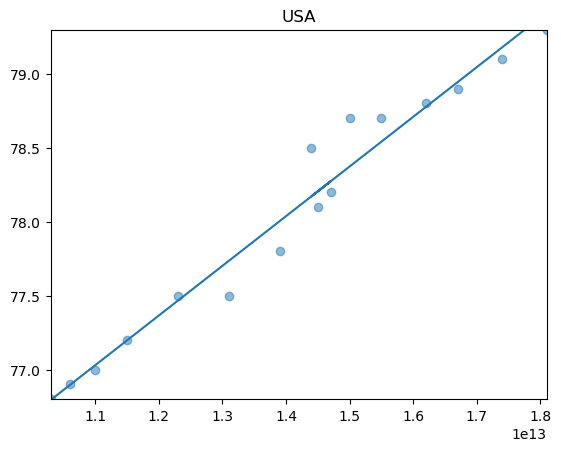

Zimbabwe
Intercept    3.799250e+01
GDP          1.335299e-09
dtype: float64


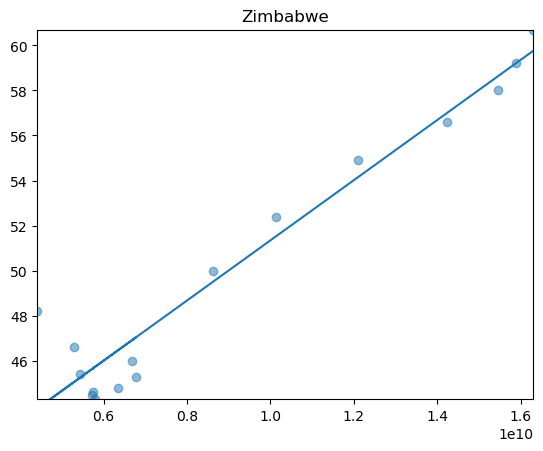

<Figure size 640x480 with 0 Axes>

In [11]:
   
def plot_linear_regression(country_data):
   # Create plot
   plt.scatter(country_data['GDP'], country_data['life_expectancy'], alpha = 0.5)
   
   # Format Plot
   plt.title(country)
   plt.xlim([country_data.GDP.min(), country_data.GDP.max()])
   plt.ylim([country_data.life_expectancy.min(), country_data.life_expectancy.max()])
   
    # Linear Regression: 
   model = sm.OLS.from_formula("life_expectancy ~ GDP", data = country_data)
   model_results = model.fit()
   print(f"{country}\n{model_results.params}")
    
   plt.plot(country_data.GDP, model_results.predict(country_data))
   plt.show()
   plt.clf()
   
countries = df.country.unique()
for country in countries:
    # Filter dataframe to country in question.
   country_data = df[df.country==country]
   plot_linear_regression(country_data)

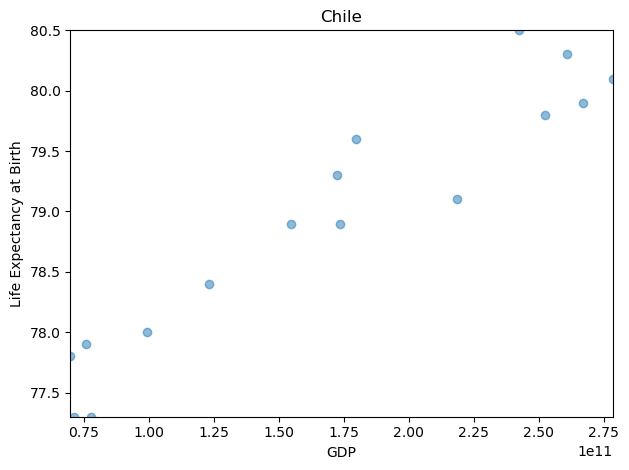

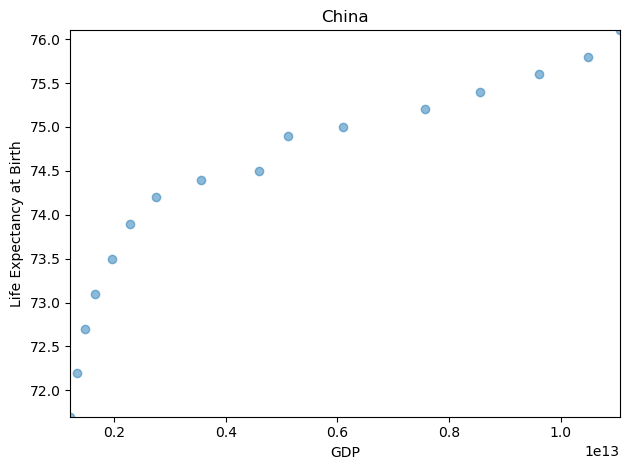

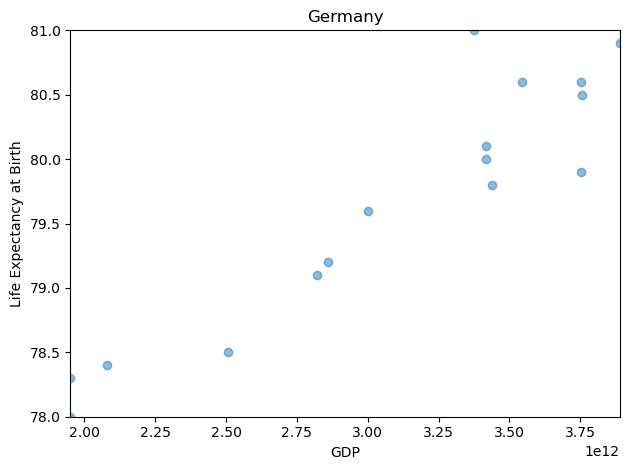

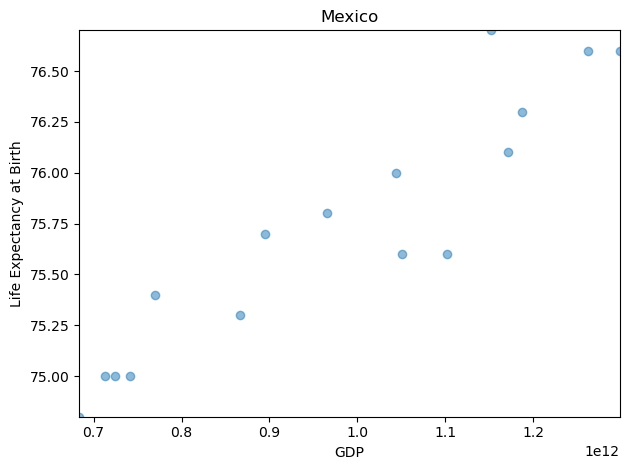

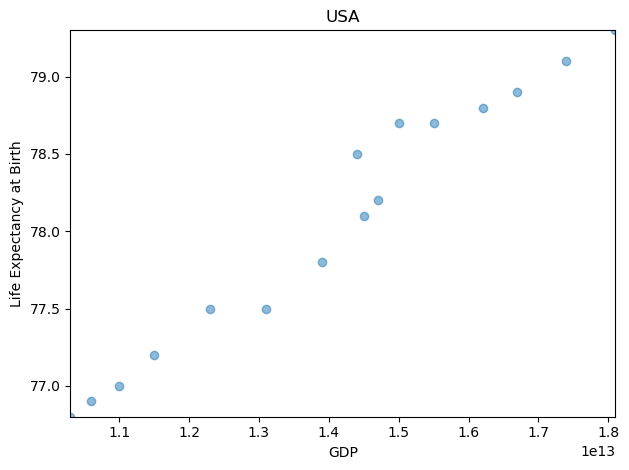

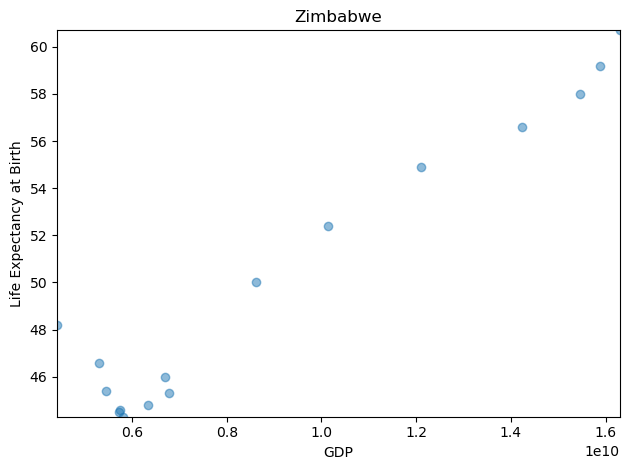

In [12]:
countries = df.country.unique()
for country in countries:
      # Filter dataframe to country in question.
   country_data = df[df.country==country]
   # Create plot at position i
   plt.scatter(country_data['GDP'], country_data['life_expectancy'], alpha = 0.5)
   
   # Format Subplot
   plt.title(country)
   
   plt.xlim([country_data.GDP.min(), country_data.GDP.max()])
   plt.ylim([country_data.life_expectancy.min(), country_data.life_expectancy.max()])
   
   plt.xlabel('GDP')
   plt.ylabel('Life Expectancy at Birth')
   plt.tight_layout()
   plt.show()

In [13]:
spearman_corr = df['GDP'].corr(df['life_expectancy'], method='spearman')
print(f"Spearman Rank Correlation Coefficient: {spearman_corr}\n")

grouped_spearman_corr = df.groupby('country').apply(lambda x: df.GDP.corr(x['life_expectancy'], method = 'spearman'))

print(f'The Spearman Rank Correlation Coeff by Country: {grouped_spearman_corr}')



Spearman Rank Correlation Coefficient: 0.4472391846883402

The Spearman Rank Correlation Coeff by Country: country
Chile       0.927836
China       1.000000
Germany     0.844739
Mexico      0.918768
USA         0.989692
Zimbabwe    0.752941
dtype: float64


### Functions to write:
1) F test 
2) T test
3) p value
 

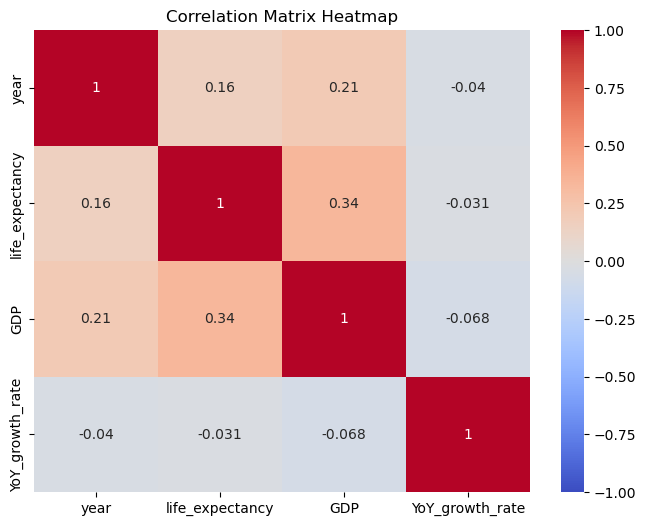

   year  life_expectancy           GDP  YoY_growth_rate
0  2000             77.3  7.786093e+10              NaN
1  2001             77.3  7.097992e+10        -8.837562
2  2002             77.8  6.973681e+10        -1.751358
3  2003             77.9  7.564346e+10         8.469915
4  2004             78.0  9.921039e+10        31.155282


In [14]:
data = df.drop('country', axis = 1)

corr_matrix = data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.show()
print(data.head())

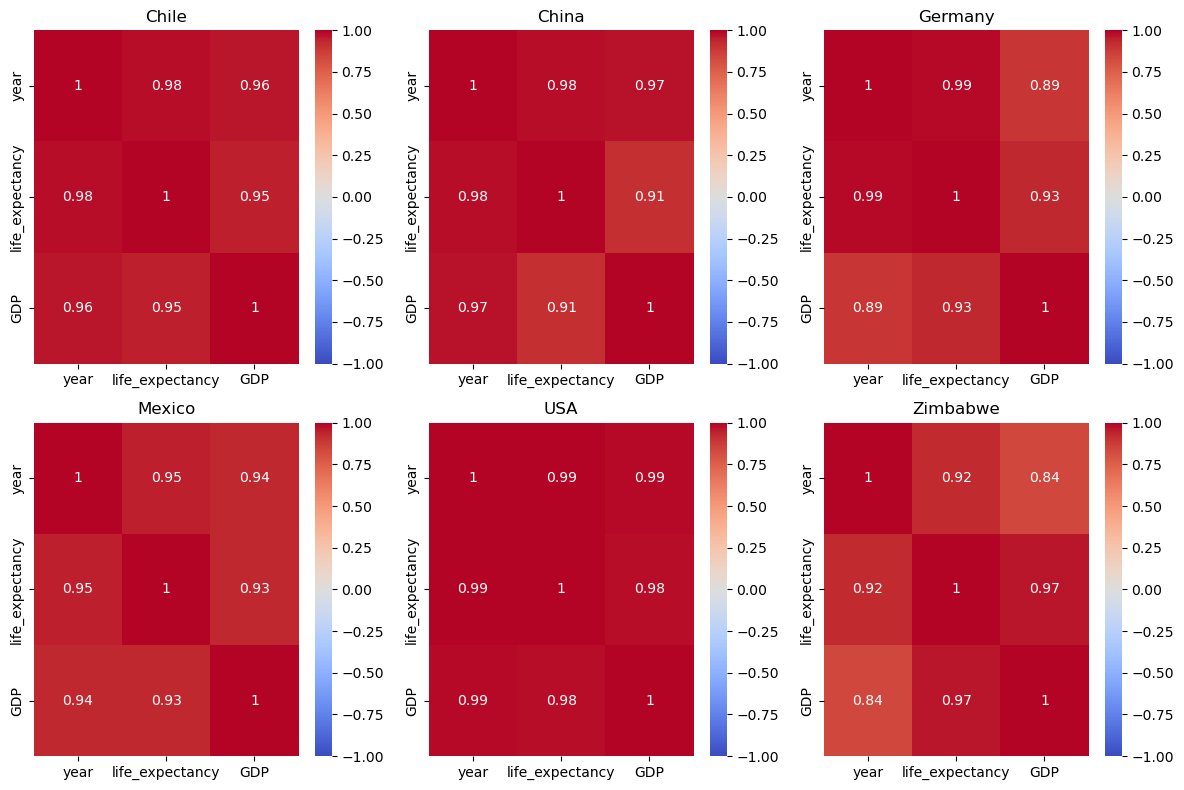

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12,8))
# Filter By Country
countries = df.country.unique()

# Flatten the axes array for easier iteration:
axes = axes.ravel()

###Create a touple of (i, country) using enumerate(countries).
## Use i for designating plot position and axes.
# Use country for accessing the data.
for i, country in enumerate(countries):
   # Filter dataframe to country in question.
   country_data = df[df.country == country]
   country_data = country_data.drop('YoY_growth_rate', axis = 1)
   # Select Columns of Correct Dtypes:
   numeric_cols = country_data.select_dtypes(include = ['float', 'int'])

   # Create Corrleation Matrix.
   corr_matrix = numeric_cols.corr()
   
   # Create plot at position i
   sns.heatmap(corr_matrix, ax = axes[i], annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
   
   # Format Subplot
   axes[i].set_title(country)
   
   # axes[i].set_xlim([df.GDP.min(), df.GDP.max()])
   # axes[i].set_ylim([df.life_expectancy.min(), df.life_expectancy.max()])
   
   # axes[i].set_xlabel('GDP')
   # axes[i].set_ylabel('Life Expectancy at Birth')


plt.tight_layout()
plt.show()

# corr_matrix = data.corr()
# plt.figure(figsize = (8,6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
# plt.title("Correlation Matrix Heatmap")

In [16]:
for country in countries:
    country_data = df[df.country == country]
    corr_coefficient, p_value = pearsonr(country_data.GDP, country_data.life_expectancy)
    print(country, round(corr_coefficient,6), p_value)


Chile 0.949877 1.8659139746585315e-08
China 0.908526 1.125098572070064e-06
Germany 0.932699 1.4018815534045922e-07
Mexico 0.932238 1.4686960248304982e-07
USA 0.981709 1.749970926909946e-11
Zimbabwe 0.9662 1.2358516366846197e-09


## Total Population GDP vs Life Expectancy 

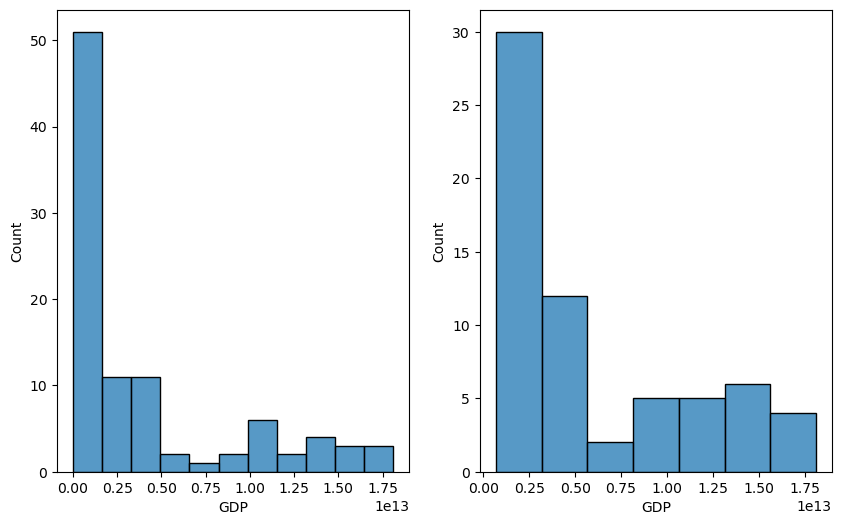

In [17]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.histplot(df.GDP)


plt.subplot(1,2,2)
sns.histplot(df.GDP[(df.country != 'Zimbabwe') & (df.country != 'Chile')])
plt.show()


In [18]:
mean_values = df.groupby('country').mean()
mean_values

,year,life_expectancy,GDP,YoY_growth_rate
country,,,,
Chile,2007.5,78.94375,1.697888e+11,8.629237
China,2007.5,74.26250,4.957714e+12,16.095828
Germany,2007.5,79.65625,3.094776e+12,4.093381
Mexico,2007.5,75.71875,9.766506e+11,3.965204
USA,2007.5,78.06250,1.407500e+13,3.851421
Zimbabwe,2007.5,50.09375,9.062580e+09,8.317480


## Cumulative Distribution Function 

How can I calculate in python the Cumulative Distribution Function (CDF)?

I want to calculate it from an array of points I have (discrete distribution), not with the continuous distributions that, for example, scipy has.

In [19]:
# sort the data:
# data_sorted = np.sort(data)

# # calculate the proportional values of samples
# p = 1. * np.arange(len(data)) / (len(data) - 1)

# 6. Grouped Analysis:


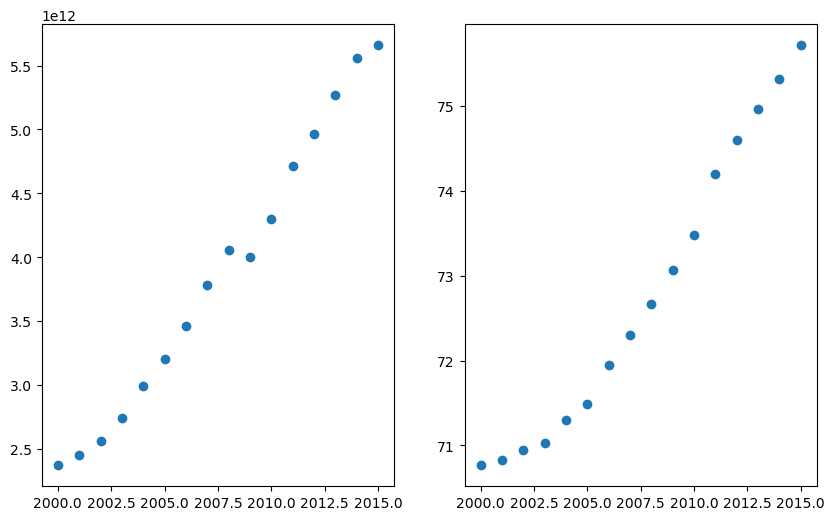

In [20]:
GDP_mean_by_year = df.groupby('year').GDP.mean()
life_expectancy_mean_by_year = df.groupby('year').life_expectancy.mean()
years = [df.year.unique()]
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
plt.scatter(GDP_mean_by_year.index, GDP_mean_by_year)
plt.subplot(1,2,2)
plt.scatter(life_expectancy_mean_by_year.index, life_expectancy_mean_by_year)

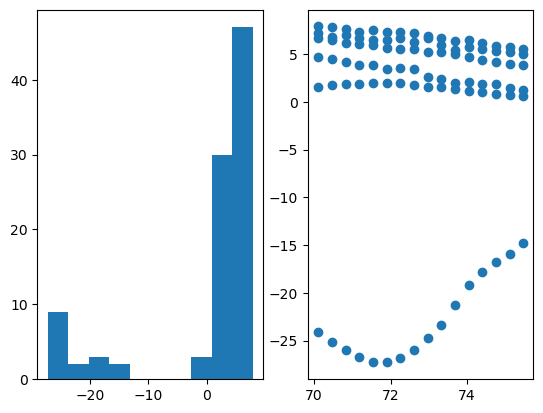

(0      7.188725
 1      6.831618
 2      6.974510
 3      6.717402
 4      6.460294
         ...    
 91   -19.139461
 92   -17.796569
 93   -16.753676
 94   -15.910784
 95   -14.767892
 Length: 96, dtype: float64,
 0     70.111275
 1     70.468382
 2     70.825490
 3     71.182598
 4     71.539706
         ...    
 91    74.039461
 92    74.396569
 93    74.753676
 94    75.110784
 95    75.467892
 Length: 96, dtype: float64)

In [21]:
def get_residuals(data_source, y_by_x, y):
    model = sm.OLS.from_formula(y_by_x, data_source)
    results = model.fit()

    # Calculate `fitted_values` here:
    fitted_values = results.predict(data_source)

    # Calculate `residuals` here:
    residuals = data_source[y] - fitted_values
    
    plt.subplot(1,2,1)
    plt.hist(residuals)
    plt.subplot(1,2,2)
    plt.scatter(fitted_values, residuals)
    plt.show()
    return residuals, fitted_values
    
get_residuals(df, 'life_expectancy ~ year', 'life_expectancy')

